# 2. Continuous Visualization

This section of visualization focuses on analyzing the distribution of student grades across various undergraduate and graduate courses at a University. The goal is to identify patterns and differences in grade distributions to draw comparisons between courses. Through this analysis, insights will be gathered on how to improve educational strategies and enhance the quality of residential education across different academic disciplines.

## 1. Histogram: Grade Distribution
I analyzed student grade distributions for six University courses: STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, and EECS 545, using data from a provided dataset `assets/class_grades.csv`. This dataset includes letter grades for students enrolled in these courses since 2015, with grades recorded in six separate columns corresponding to each course.

I converted the letter grades into grade points based on the university's grading scale and created histograms to illustrate the grade distributions for each course. These histograms, devoid of gaps between bars, were supplemented with normal distribution curves that matched the samples in mean and standard deviation.

For each course's histogram, I included a legend indicating the course name and the number of student records analyzed, demonstrating the impact of sample size on performance analysis. Specifically, for the STATS 250 course, I also examined a random sample of 100 student grades and overlayed a t-distribution, the t-distribution (yellow) is unable to smoothed out.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import re
%matplotlib inline

df = pd.read_csv('assets/assets/class_grades.csv') 
df = df.iloc[:, 1:]

VALID_GRADES = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
NUMERIC_GRADES = [4.3, 4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]
grade_points = dict(zip(VALID_GRADES, NUMERIC_GRADES))

df_points = df.replace({
    'ECON101_grade': grade_points, 
    'ENGLISH125_grade': grade_points, 
    'DATASCI306_grade': grade_points, 
    'MATH217_grade': grade_points,
    'STATS250_grade': grade_points,
    'EECS545_grade': grade_points
})

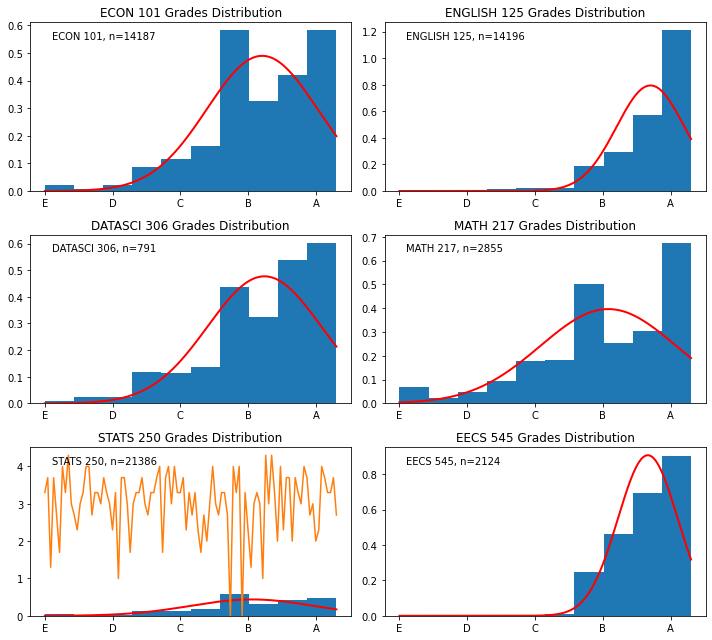

In [270]:
def grade_distribution():
    # takes in a dataframe the defaut format is the df_points which containing grade points for six courses
    # loop through each column. Perform following tasks: 
    # 1)Drop NaN values. 2)Calculate mean value 3)Calculate standard deviation 4)Generate a range of x values using np.linspace
    # 5)Generate normal distribution values using the same mean, std and x values range with norm.pdf 6)plot histogram and normalize value to 1 with density paramter
    # 7)Plot the normal distrubtion line with the pdf values
    
    df = df_points
    fig, axs = plt.subplots(3,2, figsize=(10,9))
    
    course_name = []
    pattern = re.compile(r'([A-Z]+)(\d+)_grade')
    for col in df.columns:
        course = pattern.sub(r'\1 \2',col)
        course_name.append(course)
    
    for i, ax in enumerate(axs.flat):
        
        df_col = df.iloc[:,i].dropna()
        mean = np.mean(df_col)
        std = np.std(df_col)
        x = np.linspace(min(df_col), max(df_col), len(df_col))   
        pdf = stats.norm.pdf(x, mean, std)
        
        ax.hist(df_col, bins=10, density=True)
        ax.plot(x, pdf, linewidth=2, color='red')
        
        # Generate the t-distribution curve for a random sample of 100 for STATs 250 class AND overlay with the histogram
        if i == 4:
            sample = df_col.sample(n=100)
            t_x = np.linspace(min(sample), max(sample), len(sample))
            t_dist = stats.t.pdf(t_x, mean, std)
            ax.plot(t_x, sample)        
            
        # Configure text and titles    
        text_y = ax.get_ylim()[1]*0.9
        ax.text(0.1,text_y, '{}, n={}'.format(course_name[i], str(len(df_col))))
        ax.set_title('{} Grades Distribution'.format(course_name[i]))
        ax.set_xticks(np.arange(5), ['E', 'D', 'C', 'B', 'A'])

        plt.tight_layout()
    return None

grade_distribution()

## 2. Grade Distribution Normality Check 

In this section, I was tasked with analyzing the grade distributions of six large residential courses at a university to assess their alignment with a normal distribution. This analysis is crucial for the teaching and learning team, as it underpins the validity of employing statistical models to make instructional recommendations aimed at enhancing student learning outcomes. To achieve this, I employed Quantile-Quantile (QQ) plots, a robust method for comparing the similarity of empirical data distributions to a theoretical distribution—in this case, the normal distribution.

I created a 3 by 2 figure, comprising six subplots, each dedicated to one of the courses under review: STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, and EECS 545. For each course, I plotted a QQ plot comparing the distribution of student grades to a normal distribution characterized by the same mean and standard deviation as the course grades. These plots are instrumental in visually assessing the normality of the grade distributions.

To enhance the interpretability of the plots, I included legends indicating the course name and the number of students whose grades were analyzed. This contextual information is vital for understanding the scale of data each plot represents. Furthermore, I marked observations lying more than two standard deviations from the QQ line to identify outliers. These annotations within each subplot highlight significant deviations from normality.

The presence or absence of outliers, as well as the overall adherence of the data points to the QQ line, provided a visual basis to evaluate the normality of the grade distributions. Courses whose grade distributions closely followed the QQ line can be considered approximately normally distributed, validating the use of certain statistical tests and models. Conversely, courses with many outliers or deviations from the line may require alternative analytical approaches.

Upon examining the QQ plots, I discussed the degree to which each course's grade distribution appears to be normally distributed. This visualization help examing whether the data sufficiently meets the conditions for statistical modeling.

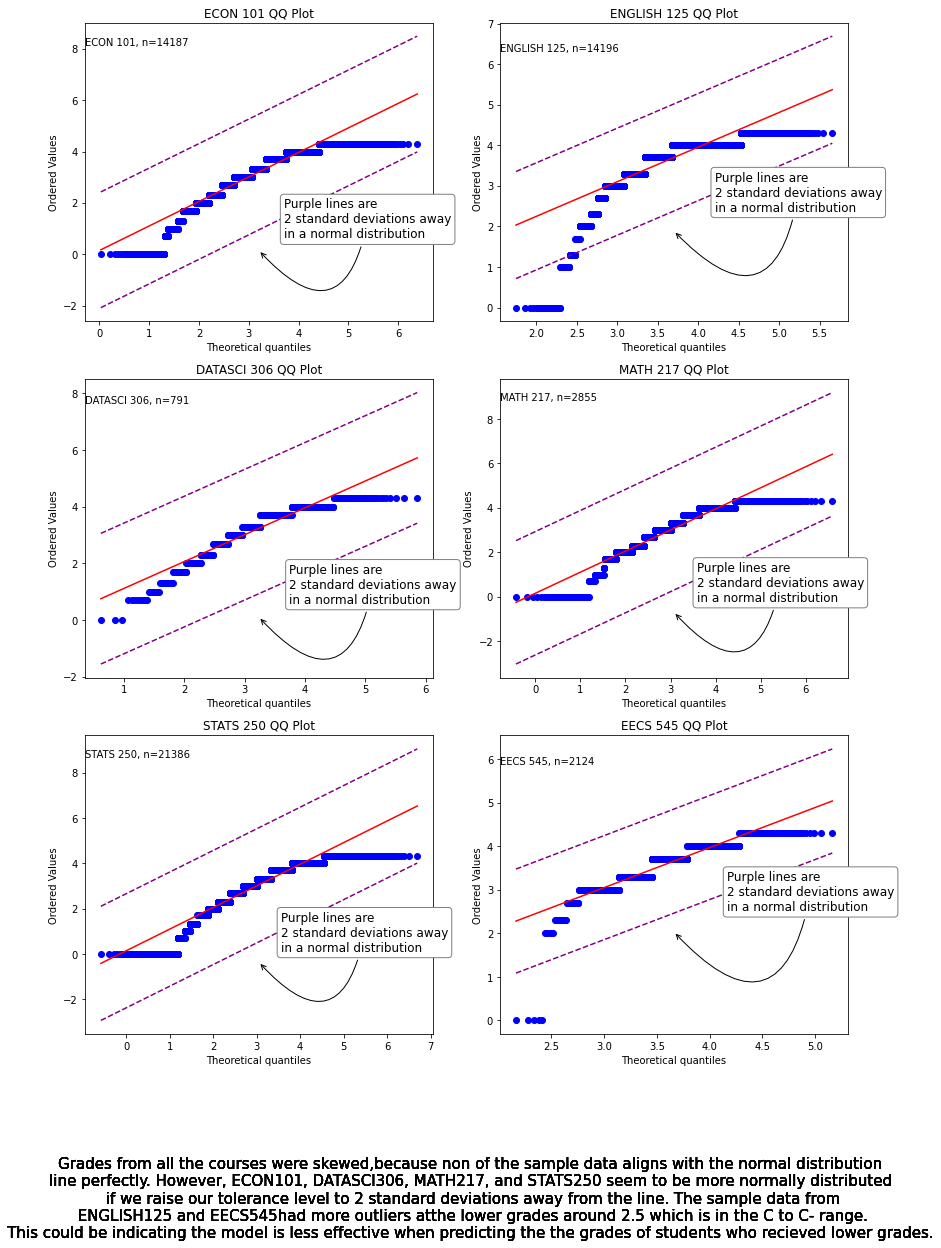

In [271]:
def grade_normality():
    
    df_t = df_points
    fig, axs = plt.subplots(3,2, figsize=(12,15))

    course_name = []
    pattern = re.compile(r'([A-Z]+)(\d+)_grade')
    for col in df_t.columns:
        course = pattern.sub(r'\1 \2',col)
        course_name.append(course)

    for i, ax in enumerate(axs.flat):
        # Loop through each course column to get the mean and standard deviation. The QQ plot is created to compare the sample data of each course to
        # a normal distribution with the same mean and standard deviation. 
        df_c = df_t.iloc[:,i].dropna()
        mean = np.mean(df_c)
        std = np.std(df_c)
    
        qq = stats.probplot(df_c, dist=stats.norm, sparams=(mean,std), plot=ax)
    
        # Create the upper and lower lines that are 2 standard deviations away from the central line in QQ plot.
        qq_x = qq[0][0]
        qq_y = qq[0][1]
        
        slope = qq[1][0]
        intercept = qq[1][1]
        upper_intercept_y = (slope * qq[0][0]) + (intercept + 2 * std * np.sqrt(1 + slope**2)) # Used formular d = |b1 - b2| / sqrt(1 + m^2) to find the y intercepts(b2)
        lower_intercept_y = (slope * qq[0][0]) + (intercept - 2 * std * np.sqrt(1 + slope**2))
    
        ax.plot(qq_x, upper_intercept_y, linestyle='--', color='purple')
        ax.plot(qq_x, lower_intercept_y, linestyle='--', color='purple')
    
        # Setting titles and texts on each plot to specify the course names and sample number.
        text_y = ax.get_ylim()[1] * 0.9
        text_x = ax.get_xlim()[0]
        ax.text(text_x, text_y, '{}, n={}'.format(course_name[i], str(len(df_c))))
        ax.set_title('{} QQ Plot'.format(course_name[i]))

        # Annotation 
        lst = qq_x.tolist()
        anno_x = lst[int(len(lst)/2)]

        anno_y1 = (lower_intercept_y[lst.index(anno_x)] - std)

        ax.annotate('Purple lines are\n2 standard deviations away\nin a normal distribution', 
                    xy=(anno_x, anno_y1), xytext=(anno_x+0.5, anno_y1+0.5),
                    arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=-1'),
                    bbox=dict(boxstyle='round', fc='white', ec='gray'),
                    fontsize=12)
        
        plt.figtext(0.5, -0.15, 'Grades from all the courses were skewed,because non of the sample data aligns with the normal distribution\nline perfectly. However, ECON101, DATASCI306, MATH217, and STATS250 seem to be more normally distributed\n if we raise our tolerance level to 2 standard deviations away from the line. The sample data from\n ENGLISH125 and EECS545had more outliers atthe lower grades around 2.5 which is in the C to C- range.\nThis could be indicating the model is less effective when predicting the the grades of students who recieved lower grades.', ha='center', fontsize=15)

        plt.tight_layout()
        
    return None

grade_normality()